In [1]:
import os
import pandas as pd
import openpyxl
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import random
from datetime import datetime, timedelta
import csv
import codecs

## 1、获取文件夹下所有文件名

In [2]:
#获取文件夹下所有文件
#采用os.listdir（）函数
#def listdir(path):            #path为文件夹的存储路径
#    list_name=[]              #保存所有文件名至列表
#    list_dir = os.listdir(path)
#    # list_dir.sort(key=lambda x:int(x[:-5])) #若文件名无中文，可对列表进行排序
#   for file in list_dir:                     #由于子文件名后缀为.xlsx，因此为-5
#       file_path = os.path.join(path, file)
#        list_name.append(file_path)
#    return list_name

In [3]:
#list_name = listdir('D:\my research\combine')
#list_name

## 2、读取多个csv内容到list中

In [4]:
#函数的输入为列表，存储着多张excel的文件位置
#函数的输出为二维列表，保存着多张excel的内容
#def textList(a):      #a即list_name为多张表的位置信息列表
#    text_csv = []           #text_excel为存储多张表的二维列表
#    for num in a:
#        csv = pd.read_csv(num,encoding="utf-8")
#       # csv = csv.values.tolist() # 选取路径中的id存入列表
#       #text_csv.extend(csv)
#    return csv #text_csv

In [5]:
#数据探索
#1 获取所有文件的名称和路径
data_path = 'D:\my research\combine'  #数据存储路径     ！！！！！按需修改这里
data_names = os.listdir(data_path)  #列举出data_path里面所有的文件名称
data = pd.DataFrame([])
#col_name = pd.DataFrame([])
for data_name in data_names: # 删除不是的文件
    if data_name.endswith('.csv'): #  ！！！！不同各格式  按需修改
        print((data_name))
        tmp =pd.read_csv(os.path.join(data_path,data_name),encoding='utf-8',index_col = 1) #3 循环读取文件
        tmp['user_id'] = data_name # 增加user_id列
        data = pd.concat([data,tmp])#4 文件存储
#data = pd.read_csv('./data/订单表2018-5.csv',encoding='gbk')  #读取


1000074972.csv
1000347570.csv
1000430147.csv
1001101015.csv
1001308507.csv
1001314242.csv
1001611277.csv
1002167111.csv
1005294681.csv
1005648701.csv
1006239677.csv
1007080235.csv
1007460937.csv
1007691822.csv
1008089993.csv
1008380274.csv
1008858081.csv
1009598262.csv
1009833504.csv
1010771507.csv
1010781532.csv
1011781162.csv
1012238997.csv
1014002467.csv
1015511402.csv
1015849915.csv
1016235847.csv
1017049054.csv
1017518181.csv
1017619773.csv
1019082005.csv
1021723135.csv
1024638724.csv
1026190613.csv
1033347980.csv
1033500861.csv
1033841971.csv
1036112523.csv
1038473793.csv
1038667883.csv
1039427481.csv
1042423333.csv
1043813850.csv
1044989990.csv
1045683252.csv
1047030000.csv
1050309123.csv
1052386573.csv
1053919573.csv
1055559070.csv
1056864281.csv
1058699077.csv
1060496582.csv
1061800204.csv
1061993475.csv
1062276283.csv
1065433494.csv
1068792030.csv
1070628805.csv
1070637337.csv
1074896921.csv
1076376253.csv
1078900100.csv
1078981053.csv
1079914734.csv
1082317395.csv
1083516424

1575049910.csv
1575953712.csv
1576093525.csv
1577379243.csv
1579593681.csv
1579897581.csv
1579969747.csv
1580140915.csv
1580210017.csv
1580269497.csv
1580333817.csv
1580724085.csv
1581020874.csv
1582187760.csv
1582332612.csv
1582375475.csv
1583000883.csv
1583200485.csv
1583547232.csv
1583719982.csv
1585081052.csv
1585242895.csv
1585388365.csv
1586055550.csv
1586283452.csv
1587646700.csv
1588723177.csv
1588778342.csv
1589394165.csv
1590113342.csv
1590958487.csv
1592148140.csv
1592869702.csv
1593596803.csv
1593680860.csv
1594193163.csv
1595066634.csv
1595966383.csv
1596337805.csv
1597168097.csv
1597248497.csv
1597399784.csv
1598226090.csv
1598866893.csv
1599134845.csv
1599458701.csv
1600397694.csv
1600889747.csv
1601083147.csv
1601815485.csv
1601943882.csv
1603324657.csv
1603699057.csv
1604580583.csv
1604800000.csv
1606328873.csv
1606513751.csv
1607778923.csv
1608010900.csv
1608716100.csv
1608909073.csv
1609256620.csv
1609573243.csv
1609708300.csv
1610498450.csv
1610761423.csv
1611029267

1741706954.csv
1741739441.csv
1741915315.csv
1741946404.csv
1742016522.csv
1742326942.csv
1742345467.csv
1742502065.csv
1742587810.csv
1742824833.csv
1743024332.csv
1743046177.csv
1743542140.csv
1743606393.csv
1743608385.csv
1743670417.csv
1743740757.csv
1744029553.csv
1744431491.csv
1745034605.csv
1745268993.csv
1745302585.csv
1745310642.csv
1745432144.csv
1745666414.csv
1745760024.csv
1745776537.csv
1746042922.csv
1746241031.csv
1746277340.csv
1746378031.csv
1746763025.csv
1747036874.csv
1747631044.csv
1747882552.csv
1747896945.csv
1747977335.csv
1747982671.csv
1747997531.csv
1748189661.csv
1748303772.csv
1748363634.csv
1748424683.csv
1748427602.csv
1748597331.csv
1748754341.csv
1749075971.csv
1749111621.csv
1749176013.csv
1749270225.csv
1749279251.csv
1749281630.csv
1749666375.csv
1749719687.csv
1750034170.csv
1750268394.csv
1750314080.csv
1750320304.csv
1750376597.csv
1750702801.csv
1750768742.csv
1750805700.csv
1750856504.csv
1751099570.csv
1751109070.csv
1751180064.csv
1751216602

1824070702.csv
1824566677.csv
1824612162.csv
1824930251.csv
1825006057.csv
1825206851.csv
1825311803.csv
1825337644.csv
1825407043.csv
1825947382.csv
1825980902.csv
1825991684.csv
1826117984.csv
1826388710.csv
1826422414.csv
1826435342.csv
1826497704.csv
1826602122.csv
1826782713.csv
1827020931.csv
1827201721.csv
1827219732.csv
1827630630.csv
1827760384.csv
1827907777.csv
1827974530.csv
1828158942.csv
1828338730.csv
1828483562.csv
1828587850.csv
1828601344.csv
1828972107.csv
1829377364.csv
1829724390.csv
1829870132.csv
1829940443.csv
1830078774.csv
1830319931.csv
1830331370.csv
1830343802.csv
1830440182.csv
1830665792.csv
1830997697.csv
1831078062.csv
1831960482.csv
1832258174.csv
1832266522.csv
1832821495.csv
1833381357.csv
1833387767.csv
1833550834.csv
1834110442.csv
1834557570.csv
1834568625.csv
1835888777.csv
1835920524.csv
1835921725.csv
1836137095.csv
1836276482.csv
1836602590.csv
1836731810.csv
1836828933.csv
1837041545.csv
1837077863.csv
1837102890.csv
1837476482.csv
1837721320

1938385222.csv
1938472997.csv
1938801401.csv
1939000383.csv
1939302951.csv
1939317337.csv
1939463673.csv
1940221927.csv
1941260807.csv
1941327447.csv
1941593775.csv
1941652641.csv
1942219837.csv
1942452194.csv
1942760931.csv
1942883585.csv
1943185324.csv
1943229052.csv
1943270972.csv
1943310380.csv
1943427507.csv
1943444084.csv
1943963020.csv
1944129340.csv
1944356690.csv
1944395571.csv
1944795672.csv
1944875745.csv
1945448720.csv
1945723517.csv
1945726115.csv
1945856135.csv
1945864631.csv
1945892293.csv
1945912295.csv
1946003505.csv
1946423807.csv
1946444057.csv
1946545395.csv
1946940464.csv
1947408397.csv
1947640783.csv
1947875374.csv
1947954210.csv
1948427221.csv
1948445637.csv
1948462991.csv
1948463037.csv
1949063415.csv
1949093854.csv
1949243365.csv
1949464645.csv
1949652915.csv
1949728483.csv
1949781111.csv
1949812987.csv
1950090281.csv
1950131294.csv
1950481851.csv
1950513584.csv
1951153195.csv
1951688183.csv
1951727905.csv
1951895052.csv
1952098385.csv
1952488467.csv
1952557221

2139695784.csv
2139784472.csv
2139789680.csv
2139869092.csv
2140220000.csv
2140546904.csv
2140628652.csv
2140756850.csv
2140790092.csv
2141081291.csv
2141277330.csv
2141293561.csv
2141511624.csv
2141653385.csv
2141690424.csv
2141715292.csv
2141729492.csv
2141868321.csv
2142394794.csv
2142500582.csv
2142884393.csv
2143333182.csv
2143423191.csv
2143494547.csv
2143872385.csv
2143970707.csv
2144268077.csv
2144278847.csv
2144493570.csv
2144545582.csv
2144676397.csv
2144871732.csv
2144959755.csv
2145180353.csv
2145323851.csv
2146262784.csv
2147110334.csv
2147276931.csv
2147405834.csv
2147422074.csv
2148442374.csv
2149564282.csv
2150546352.csv
2150826805.csv
2151093721.csv
2151175613.csv
2151273847.csv
2151317510.csv
2152081294.csv
2152213263.csv
2152526007.csv
2152541785.csv
2152653051.csv
2153340884.csv
2153891772.csv
2153899037.csv
2154989672.csv
2156798477.csv
2157141695.csv
2157268180.csv
2157376434.csv
2157440815.csv
2158274220.csv
2158810041.csv
2160460814.csv
2160960314.csv
2161438000

2369716857.csv
2369801754.csv
2370263922.csv
2370403910.csv
2370490650.csv
2371209932.csv
2371827432.csv
2372235843.csv
2373274555.csv
2373322971.csv
2373603915.csv
2374510344.csv
2375430861.csv
2375818192.csv
2376157734.csv
2376220474.csv
2377300915.csv
2377675822.csv
2378163082.csv
2378313863.csv
2378482450.csv
2379123075.csv
2379418587.csv
2379509091.csv
2380199647.csv
2382428257.csv
2383097825.csv
2383680247.csv
2383760407.csv
2384264022.csv
2384621712.csv
2385862982.csv
2385949974.csv
2386397987.csv
2386398750.csv
2386930824.csv
2387084422.csv
2387145032.csv
2387234625.csv
2388532861.csv
2388619905.csv
2389113355.csv
2389203795.csv
2389270443.csv
2389499845.csv
2389677293.csv
2389834720.csv
2389977514.csv
2390198810.csv
2390234642.csv
2390562992.csv
2393167901.csv
2393357191.csv
2393487277.csv
2393601125.csv
2393670735.csv
2394018385.csv
2395709751.csv
2395765274.csv
2395826367.csv
2396480302.csv
2397183293.csv
2398225344.csv
2398836367.csv
2400433761.csv
2402388111.csv
2402655141

2637395870.csv
2637814075.csv
2638206023.csv
2639405983.csv
2639847351.csv
2639965984.csv
2640621504.csv
2640694371.csv
2640724773.csv
2640754883.csv
2640850403.csv
2641730961.csv
2641945870.csv
2642881093.csv
2643046152.csv
2643292430.csv
2643795354.csv
2643798692.csv
2643937301.csv
2644761665.csv
2644824571.csv
2644857021.csv
2644928473.csv
2645135751.csv
2645441725.csv
2646573493.csv
2646629923.csv
2646846462.csv
2647953047.csv
2648085511.csv
2648654727.csv
2649965600.csv
2650125643.csv
2650167007.csv
2650407430.csv
2650635063.csv
2650647287.csv
2650688063.csv
2650814904.csv
2651230945.csv
2651271025.csv
2651372131.csv
2651919630.csv
2652493310.csv
2652670712.csv
2652969581.csv
2653152874.csv
2653321087.csv
2653675860.csv
2654589857.csv
2654857453.csv
2655290437.csv
2655380813.csv
2655635221.csv
2656092743.csv
2656229833.csv
2656751740.csv
2657206181.csv
2657246051.csv
2657435670.csv
2657758761.csv
2657978027.csv
2658161513.csv
2658523983.csv
2658585207.csv
2658593221.csv
2659523691

2854335212.csv
2854421694.csv
2854495004.csv
2855125372.csv
2855377272.csv
2855425453.csv
2856171672.csv
2856183384.csv
2856412520.csv
2856442533.csv
2857405112.csv
2857478752.csv
2858920075.csv
2859433970.csv
2859508784.csv
2859707060.csv
2859714164.csv
2860604881.csv
2860825582.csv
2861924461.csv
2862003657.csv
2862660880.csv
2862687334.csv
2863100662.csv
2863173354.csv
2863319120.csv
2863344755.csv
2863503162.csv
2864132124.csv
2864284772.csv
2864365232.csv
2865670932.csv
2865714770.csv
2865807784.csv
2866748562.csv
2867469152.csv
2867663764.csv
2868569720.csv
2869456984.csv
2870137340.csv
2870815301.csv
2872174100.csv
2872698607.csv
2873104400.csv
2873172824.csv
2873215822.csv
2873275702.csv
2873901964.csv
2874101704.csv
2874251184.csv
2874430532.csv
2874653485.csv
2874726234.csv
2874821740.csv
2874826380.csv
2874881717.csv
2874997047.csv
2875096527.csv
2875253952.csv
2875285950.csv
2875313510.csv
2875384272.csv
2875612544.csv
2875873720.csv
2876593742.csv
2876892134.csv
2877240632

3159018450.csv
3162026557.csv
3162514942.csv
3162782680.csv
3162915953.csv
3163529902.csv
3163717987.csv
3163861010.csv
3164113847.csv
3164339853.csv
3164875344.csv
3165093044.csv
3165212300.csv
3165445453.csv
3165588892.csv
3165661982.csv
3165713234.csv
3166072630.csv
3166696344.csv
3167396473.csv
3167502062.csv
3167604292.csv
3168303062.csv
3168589505.csv
3168663222.csv
3169031372.csv
3169089642.csv
3169124415.csv
3169386437.csv
3169490530.csv
3169507323.csv
3169784652.csv
3169896264.csv
3170428330.csv
3170468501.csv
3170605414.csv
3170825925.csv
3170874220.csv
3171392602.csv
3171524127.csv
3172158271.csv
3172200987.csv
3172282237.csv
3172438704.csv
3172736135.csv
3172885667.csv
3172991540.csv
3173109831.csv
3173670460.csv
3173866000.csv
3173891654.csv
3173962235.csv
3174972107.csv
3175298332.csv
3175308863.csv
3175635461.csv
3176735920.csv
3177001584.csv
3177030062.csv
3177336715.csv
3177486430.csv
3177536871.csv
3178149134.csv
3178278270.csv
3178363081.csv
3178392374.csv
3178503924

3556732187.csv
3557438331.csv
3557510602.csv
3557610190.csv
3557746490.csv
3558339850.csv
3560044213.csv
3560529101.csv
3560840371.csv
3561526577.csv
3563079945.csv
3563259691.csv
3563397787.csv
3563497565.csv
3564197341.csv
3564348640.csv
3564694841.csv
3565106623.csv
3565272591.csv
3566508977.csv
3566799392.csv
3568126055.csv
3568296755.csv
3568321993.csv
3568327260.csv
3568332634.csv
3568531127.csv
3568831543.csv
3570466670.csv
3571784660.csv
3574738821.csv
3575930364.csv
3575948865.csv
3576959991.csv
3579355720.csv
3579649785.csv
3580003807.csv
3580138687.csv
3583460542.csv
3584855745.csv
3587584955.csv
3590468323.csv
3591238994.csv
3592196177.csv
3592659197.csv
3593493700.csv
3593725700.csv
3594648054.csv
3596571312.csv
3596754147.csv
3599151201.csv
3599732780.csv
3602435262.csv
3602822841.csv
3602912942.csv
3603101773.csv
3603520924.csv
3605711264.csv
3606660321.csv
3607146520.csv
3607228195.csv
3607650423.csv
3607848481.csv
3608053440.csv
3608078843.csv
3608151050.csv
3608586763

3944425782.csv
3945115431.csv
3946111171.csv
3946350999.csv
3947297063.csv
3947385357.csv
3947581159.csv
3947680028.csv
3947878246.csv
3948313602.csv
3949203203.csv
3949741771.csv
3950113277.csv
3951977316.csv
3952393267.csv
3953958697.csv
3953960451.csv
3956578315.csv
3956884315.csv
3957283017.csv
3957856771.csv
3958250505.csv
3958453932.csv
3959716380.csv
3959741134.csv
3959824378.csv
3960056094.csv
3960828041.csv
3961052835.csv
3961316134.csv
3961586890.csv
3962031720.csv
3962195095.csv
3963085037.csv
3963392384.csv
3963459036.csv
3964099560.csv
3964604837.csv
3964943319.csv
3965175593.csv
3965674892.csv
3967500643.csv
3967823135.csv
3968258052.csv
3968533287.csv
3968696326.csv
3968968723.csv
3969022875.csv
3969072677.csv
3969679346.csv
3969916309.csv
3970370306.csv
3970760633.csv
3971609151.csv
3971610877.csv
3975120555.csv
3975377389.csv
3975701247.csv
3976350607.csv
3976453754.csv
3976682075.csv
3977397783.csv
3979085609.csv
3979495427.csv
3979711747.csv
3980070678.csv
3980127981

5206886014.csv
5206942989.csv
5207790662.csv
5208005061.csv
5208261933.csv
5208283577.csv
5208545572.csv
5209059928.csv
5209534155.csv
5209694442.csv
5210059580.csv
5210839993.csv
5210867886.csv
5210976949.csv
5211216574.csv
5211367498.csv
5211890955.csv
5212423179.csv
5212875594.csv
5213364812.csv
5213518794.csv
5214333599.csv
5214601866.csv
5215334726.csv
5215346989.csv
5215490667.csv
5215745659.csv
5216023184.csv
5216056852.csv
5216449902.csv
5216660288.csv
5216735972.csv
5216829302.csv
5217022160.csv
5217375374.csv
5217838704.csv
5218796415.csv
5218899247.csv
5219070986.csv
5219598749.csv
5219879218.csv
5219887684.csv
5219980067.csv
5220067816.csv
5220882072.csv
5221164467.csv
5221183059.csv
5222504390.csv
5223988327.csv
5224187109.csv
5224657523.csv
5224869634.csv
5225115373.csv
5225284669.csv
5225537173.csv
5225563494.csv
5225994520.csv
5227177452.csv
5227883424.csv
5227908257.csv
5228011277.csv
5228300446.csv
5228418779.csv
5229396086.csv
5230688487.csv
5230862887.csv
5231189660

5375816007.csv
5375954971.csv
5376717147.csv
5377648012.csv
5379780071.csv
5380042366.csv
5380186626.csv
5380422046.csv
5380594613.csv
5380711799.csv
5380749725.csv
5380870956.csv
5381169665.csv
5382201951.csv
5382268224.csv
5382271470.csv
5382964375.csv
5383635727.csv
5383937096.csv
5384669567.csv
5385031260.csv
5385170305.csv
5385188707.csv
5385436556.csv
5385605298.csv
5385614362.csv
5385714088.csv
5385828276.csv
5385890506.csv
5386791120.csv
5387362526.csv
5388117301.csv
5388661381.csv
5389383367.csv
5389657411.csv
5389711479.csv
5389926021.csv
5390099213.csv
5390296058.csv
5390930966.csv
5391183613.csv
5391412617.csv
5391491966.csv
5392303574.csv
5392331474.csv
5392951088.csv
5393125046.csv
5393286482.csv
5393695141.csv
5394064882.csv
5394170333.csv
5394340886.csv
5395832314.csv
5396208837.csv
5396486631.csv
5396657048.csv
5396911648.csv
5397340090.csv
5397427639.csv
5397740031.csv
5397743196.csv
5398228969.csv
5398691593.csv
5398834966.csv
5399213671.csv
5399286759.csv
5399292046

5581512822.csv
5581625720.csv
5581708414.csv
5581766794.csv
5581849635.csv
5582357954.csv
5582501291.csv
5582657395.csv
5582711596.csv
5583074754.csv
5583981604.csv
5584077831.csv
5584370669.csv
5584396930.csv
5584969310.csv
5585038145.csv
5585261071.csv
5585861501.csv
5585909058.csv
5585920563.csv
5586227597.csv
5586344697.csv
5586830217.csv
5587027607.csv
5587330976.csv
5587336208.csv
5587368031.csv
5587578731.csv
5587609371.csv
5587699308.csv
5588724386.csv
5589027195.csv
5589034550.csv
5589039048.csv
5589268299.csv
5589419553.csv
5589536071.csv
5589537098.csv
5589771461.csv
5589805022.csv
5589822771.csv
5590542150.csv
5590831034.csv
5590841577.csv
5591105146.csv
5591207860.csv
5591411026.csv
5591535852.csv
5591707522.csv
5591934960.csv
5592258796.csv
5592350212.csv
5592451180.csv
5593768807.csv
5594060496.csv
5594645689.csv
5594844605.csv
5596436757.csv
5596599752.csv
5597664964.csv
5597791498.csv
5597916914.csv
5598152788.csv
5598172780.csv
5598290389.csv
5598422391.csv
5598532942

5702654899.csv
5702670473.csv
5702959251.csv
5704038043.csv
5704324892.csv
5704703572.csv
5704969108.csv
5705086211.csv
5705547100.csv
5705724286.csv
5705744538.csv
5705757816.csv
5705823017.csv
5705862807.csv
5705952305.csv
5705984983.csv
5706029407.csv
5706042003.csv
5706387633.csv
5706695921.csv
5706957750.csv
5706973828.csv
5706980544.csv
5707003203.csv
5707970318.csv
5708206051.csv
5708373346.csv
5708597716.csv
5708693009.csv
5709475918.csv
5709753243.csv
5709768139.csv
5709901383.csv
5709975838.csv
5710234507.csv
5710289113.csv
5710387554.csv
5710849481.csv
5711111346.csv
5711175491.csv
5711239681.csv
5711617078.csv
5711661916.csv
5712265484.csv
5712591536.csv
5712640986.csv
5712664417.csv
5712921425.csv
5713215100.csv
5713252422.csv
5713661907.csv
5714254460.csv
5714277027.csv
5714805158.csv
5714818581.csv
5714843204.csv
5714950741.csv
5715115012.csv
5715125131.csv
5715251944.csv
5715295204.csv
5715303775.csv
5715604892.csv
5716121041.csv
5716190736.csv
5716243472.csv
5717296717

5880973746.csv
5881530739.csv
5881681818.csv
5881905872.csv
5881910850.csv
5882119502.csv
5882144402.csv
5883599746.csv
5884208709.csv
5884250723.csv
5884318735.csv
5885561399.csv
5885731780.csv
5886700123.csv
5887210675.csv
5888037815.csv
5888800041.csv
5888809440.csv
5888842220.csv
5889432438.csv
5890231443.csv
5890748175.csv
5891028851.csv
5891044729.csv
5891182554.csv
5891197601.csv
5891988923.csv
5891996070.csv
5892155590.csv
5892467242.csv
5892885674.csv
5892909963.csv
5892940835.csv
5893261879.csv
5893332744.csv
5893504682.csv
5893505543.csv
5894168941.csv
5894657632.csv
5896183151.csv
5896436581.csv
5896537482.csv
5896686854.csv
5896741046.csv
5896884766.csv
5896999358.csv
5897026097.csv
5897936589.csv
5898017655.csv
5898345609.csv
5899459928.csv
5899831269.csv
5899857339.csv
5899936437.csv
5899975802.csv
5899981854.csv
5900684015.csv
5900749588.csv
5900783080.csv
5901227732.csv
5901358210.csv
5902513354.csv
5902620022.csv
5902772731.csv
5902895252.csv
5903725018.csv
5904357755

6065796548.csv
6065874231.csv
6066190809.csv
6066470577.csv
6066557239.csv
6067033879.csv
6067403356.csv
6067450594.csv
6067643704.csv
6067649002.csv
6067735256.csv
6068246638.csv
6068282562.csv
6068320428.csv
6068347290.csv
6069025248.csv
6069297777.csv
6069743586.csv
6070193479.csv
6070321260.csv
6070962907.csv
6071223174.csv
6071446545.csv
6071503611.csv
6071551938.csv
6071622252.csv
6072887983.csv
6073483421.csv
6073756991.csv
6074049030.csv
6074264071.csv
6075707284.csv
6075744836.csv
6075913076.csv
6076004116.csv
6076005348.csv
6076448691.csv
6076574741.csv
6076620650.csv
6077109723.csv
6077199457.csv
6077530499.csv
6077722469.csv
6077982977.csv
6078782243.csv
6079402985.csv
6079519566.csv
6079573972.csv
6079625062.csv
6080030416.csv
6080136724.csv
6081180146.csv
6082141138.csv
6082153624.csv
6082992301.csv
6083150106.csv
6083286552.csv
6083299293.csv
6083623627.csv
6084136024.csv
6084471054.csv
6084494693.csv
6084648826.csv
6085218398.csv
6085369858.csv
6086197545.csv
6086469002

6308230448.csv
6309031718.csv
6309204698.csv
6309568335.csv
6310417495.csv
6311004248.csv
6312135171.csv
6312370356.csv
6312386104.csv
6312607359.csv
6312804523.csv
6313326224.csv
6313415036.csv
6313685670.csv
6315120859.csv
6315829266.csv
6315899979.csv
6316079406.csv
6316097602.csv
6317176392.csv
6318416459.csv
6318790762.csv
6319010084.csv
6319613955.csv
6320174557.csv
6320462655.csv
6320681262.csv
6321056111.csv
6321159201.csv
6321589166.csv
6321897505.csv
6321962763.csv
6322512220.csv
6322537675.csv
6322617474.csv
6322832897.csv
6323626848.csv
6323630001.csv
6323842899.csv
6324214889.csv
6325044331.csv
6325317056.csv
6325445169.csv
6325517513.csv
6325972432.csv
6326045015.csv
6326351574.csv
6327020080.csv
6327223453.csv
6327866012.csv
6327926336.csv
6328487109.csv
6328730875.csv
6328807934.csv
6329438295.csv
6329614678.csv
6330087912.csv
6330794244.csv
6331405817.csv
6331525465.csv
6331721689.csv
6331991918.csv
6332700151.csv
6332799305.csv
6332833030.csv
6332974741.csv
6334394548

6520071379.csv
6520310697.csv
6520394697.csv
6520673155.csv
6521680802.csv
6522983631.csv
6523771814.csv
6524445623.csv
6524682288.csv
6525855034.csv
6526218400.csv
6526223205.csv
6526716979.csv
6527609084.csv
6527636400.csv
6527749486.csv
6527897716.csv
6528467294.csv
6528643063.csv
6528825790.csv
6529097615.csv
6529652142.csv
6529828070.csv
6530596871.csv
6530666679.csv
6530977695.csv
6531546982.csv
6532322331.csv
6533345120.csv
6533809060.csv
6534135989.csv
6534424946.csv
6534759097.csv
6534880008.csv
6534981394.csv
6535872746.csv
6536173245.csv
6536859132.csv
6537219597.csv
6537779677.csv
6538052313.csv
6538238300.csv
6538333202.csv
6538948894.csv
6538991862.csv
6539862592.csv
6540015801.csv
6540337192.csv
6540697879.csv
6541101807.csv
6541197742.csv
6541755738.csv
6541869963.csv
6542150421.csv
6542233995.csv
6543194297.csv
6543740910.csv
6545112261.csv
6545135768.csv
6545188391.csv
6545343667.csv
6545472084.csv
6545901204.csv
6546537300.csv
6547665375.csv
6547888180.csv
6548007869

6989585822.csv
6989933221.csv
6990430442.csv
6990761342.csv
6990970066.csv
6991421381.csv
6991576008.csv
6991759947.csv
6992141081.csv
6993371580.csv
6993918874.csv
6994203490.csv
6995416475.csv
6995432960.csv
6995841387.csv
6996304162.csv
6997273794.csv
6997846586.csv
6998391170.csv
6999183977.csv
6999318468.csv
6999462704.csv
7000003880.csv
7000703442.csv
7001450247.csv
7002205796.csv
7003293313.csv
7003327354.csv
7003613079.csv
7005354142.csv
7006633212.csv
7006865024.csv
7008005492.csv
7008339076.csv
7008603378.csv
7009657932.csv
7011691554.csv
7011754539.csv
7013635923.csv
7013982961.csv
7014683211.csv
7015631266.csv
7016221895.csv
7016910067.csv
7016946239.csv
7017570072.csv
7018249671.csv
7019465086.csv
7021335835.csv
7023008686.csv
7023285296.csv
7024545171.csv
7024663342.csv
7025892185.csv
7026641520.csv
7026654848.csv
7027016747.csv
7027330039.csv
7028782587.csv
7028959370.csv
7029959808.csv
7033147560.csv
7033232396.csv
7033908468.csv
7034496056.csv
7034685948.csv
7035227251

7403943436.csv
7403973984.csv
7403981176.csv
7404415528.csv
7404925451.csv
7405674718.csv
7405745819.csv
7406050749.csv
7406131380.csv
7406468255.csv
7406724083.csv
7407492795.csv
7408170885.csv
7408843857.csv
7408990929.csv
7409570037.csv
7409933704.csv
7410058058.csv
7410570682.csv
7411102698.csv
7411133807.csv
7411411608.csv
7413123290.csv
7413322813.csv
7413674706.csv
7413902436.csv
7414026857.csv
7414248670.csv
7414582791.csv
7415345759.csv
7415395383.csv
7415608070.csv
7415734337.csv
7415974550.csv
7416007355.csv
7416308713.csv
7416357469.csv
7416826908.csv
7417563555.csv
7418577330.csv
7419004123.csv
7419406060.csv
7421615032.csv
7422193148.csv
7423237371.csv
7423719053.csv
7424537221.csv
7424814892.csv
7425458481.csv
7427433887.csv
7428625867.csv
7429977252.csv
7430333858.csv
7431365575.csv
7432623022.csv
7432760675.csv
7434537208.csv
7434858653.csv
7435995300.csv
7436609301.csv
7436640687.csv
7436643350.csv
7436757754.csv
7436787668.csv
7437209263.csv
7437289952.csv
7437742894

7705136075.csv
7707687624.csv
7707743096.csv
7708623580.csv
7710483600.csv
7711105525.csv
7711154860.csv
7711302189.csv
7712089832.csv
7712408675.csv
7714109712.csv
7714141428.csv
7714489975.csv
7714687394.csv
7714766190.csv
7714880034.csv
7715181564.csv
7716002450.csv
7716520124.csv
7716606963.csv
7717529486.csv
7717533554.csv
7718584747.csv
7718617454.csv
7718858833.csv
7718957670.csv
7719241804.csv
7719961659.csv
7720692920.csv
7721357984.csv
7721509512.csv
7721526711.csv
7721930687.csv
7722268916.csv
7722516630.csv
7722582684.csv
7723199642.csv
7723771326.csv
7724692570.csv
7725102265.csv
7725441456.csv
7725523622.csv
7726181697.csv
7726264535.csv
7727148362.csv
7727329363.csv
7727673913.csv
7727709152.csv
7727821170.csv
7728725787.csv
7728748526.csv
7729309505.csv
7729551897.csv
7730816328.csv
7731088091.csv
7731333739.csv
7731350322.csv
7731411944.csv
7731421468.csv
7731594206.csv
7731739987.csv
7731831231.csv
7731966090.csv
7732222739.csv
7732622897.csv
7732889786.csv
7732922231

In [6]:
data.head()

,id,bid,正文,头条文章url,原始图片url,视频url,位置,日期,工具,点赞数,评论数,转发数,话题,@用户,user_id
LvQzn0z2j,4775902490134683,#上海民生##上海疫情##核酸#检测《上海人核酸“续命”尴尬：缺管子、乱加码、排队最长3小时...,NaN,https://wx3.sinaimg.cn/large/3b9beedcly1h2ttw8...,NaN,NaN,2022-06-02,百度App,2,2,0,"上海民生,上海疫情,核酸",NaN,2022-06-02 13:22:28,1000074972.csv
LvqMcaG67,4774911002545107,#上海民生##上海疫情##上海复工#上海醒来，6月1号不会是哄孩子的吧。6月1日零时起 上海...,NaN,https://wx4.sinaimg.cn/large/3b9beedcly1h2qo0o...,NaN,NaN,2022-05-30,百度App,0,0,0,"上海民生,上海疫情,上海复工",NaN,2022-05-30 19:42:39,1000074972.csv
LteQ4pIio,4769685566128476,#上海民生##上海疫情# 有关团长《独家｜起底“团长江湖”：平价被抵制、供应商“强制”加价、...,NaN,https://wx4.sinaimg.cn/large/3b9beedcly1h29zws...,NaN,NaN,2022-05-16,百度App,0,0,0,"上海民生,上海疫情",NaN,2022-05-16 09:38:37,1000074972.csv
LrXv3BmpR,4766635778904307,#居委会##上海民生##上海疫情# 上海奇葩居委干部，假借抗疫强索私吞翡翠，官方属实》一个居...,NaN,https://wx2.sinaimg.cn/large/3b9beedcly1h209nj...,NaN,NaN,2022-05-07,百度App,0,0,0,"居委会,上海民生,上海疫情",NaN,2022-05-07 23:39:52,1000074972.csv
Lr0xLohc7,4764369495785971,#上海民生##上海疫情# 祝贺🎉五一劳动节，迎接双满月，你劳动了吗？,NaN,https://wx3.sinaimg.cn/large/3b9beedcly1h1t1cy...,NaN,NaN,2022-05-01,HUAWEI Mate30 Pro 5G,0,0,0,"上海民生,上海疫情",NaN,2022-05-01 17:34:27,1000074972.csv


In [7]:
data.shape

(884217, 15)

In [8]:
data.columns = ['bid','正文','头条文章url','原始图片url','视频url','位置','日期','工具','点赞数','评论数','转发数','话题','@用户','time','user_id']

In [9]:
#获取单元内容
a=data['bid'] # 先列，后行
a

LvQzn0z2j    4775902490134683
LvqMcaG67    4774911002545107
LteQ4pIio    4769685566128476
LrXv3BmpR    4766635778904307
Lr0xLohc7    4764369495785971
                   ...       
LuNJvmTh9    4773410175455699
LuNGT7h1B    4773408551733743
LuNFjCwlo    4773407579180798
LuNF4BDiO    4773407428969218
LuNECwg9M    4773407147688606
Name: bid, Length: 884217, dtype: int64

In [25]:
#选取正文、时间、user_id
data_select = data[['正文','日期','time','user_id']]
data_select.head()

,正文,日期,time,user_id
LvQzn0z2j,#上海民生##上海疫情##核酸#检测《上海人核酸“续命”尴尬：缺管子、乱加码、排队最长3小时...,2022-06-02,2022-06-02 13:22:28,1000074972.csv
LvqMcaG67,#上海民生##上海疫情##上海复工#上海醒来，6月1号不会是哄孩子的吧。6月1日零时起 上海...,2022-05-30,2022-05-30 19:42:39,1000074972.csv
LteQ4pIio,#上海民生##上海疫情# 有关团长《独家｜起底“团长江湖”：平价被抵制、供应商“强制”加价、...,2022-05-16,2022-05-16 09:38:37,1000074972.csv
LrXv3BmpR,#居委会##上海民生##上海疫情# 上海奇葩居委干部，假借抗疫强索私吞翡翠，官方属实》一个居...,2022-05-07,2022-05-07 23:39:52,1000074972.csv
Lr0xLohc7,#上海民生##上海疫情# 祝贺🎉五一劳动节，迎接双满月，你劳动了吗？,2022-05-01,2022-05-01 17:34:27,1000074972.csv


In [26]:
#去掉user_id 中后辍的.csv
data_select['user_id'] = data_select['user_id'].map(lambda x: str(x)[:-4])
#data_select['user_id']=data_select['user_id'].str.replace('.csv','')
data_select.head()

,正文,日期,time,user_id
LvQzn0z2j,#上海民生##上海疫情##核酸#检测《上海人核酸“续命”尴尬：缺管子、乱加码、排队最长3小时...,2022-06-02,2022-06-02 13:22:28,1000074972
LvqMcaG67,#上海民生##上海疫情##上海复工#上海醒来，6月1号不会是哄孩子的吧。6月1日零时起 上海...,2022-05-30,2022-05-30 19:42:39,1000074972
LteQ4pIio,#上海民生##上海疫情# 有关团长《独家｜起底“团长江湖”：平价被抵制、供应商“强制”加价、...,2022-05-16,2022-05-16 09:38:37,1000074972
LrXv3BmpR,#居委会##上海民生##上海疫情# 上海奇葩居委干部，假借抗疫强索私吞翡翠，官方属实》一个居...,2022-05-07,2022-05-07 23:39:52,1000074972
Lr0xLohc7,#上海民生##上海疫情# 祝贺🎉五一劳动节，迎接双满月，你劳动了吗？,2022-05-01,2022-05-01 17:34:27,1000074972


In [27]:
data_select.dtypes

正文         object
日期         object
time       object
user_id    object
dtype: object

In [28]:
#将日期这一列转换为时间数据格式
data_select['日期'] = pd.to_datetime(data_select['日期'])
data_select.dtypes

正文                 object
日期         datetime64[ns]
time               object
user_id            object
dtype: object

In [29]:
data_select.head()

,正文,日期,time,user_id
LvQzn0z2j,#上海民生##上海疫情##核酸#检测《上海人核酸“续命”尴尬：缺管子、乱加码、排队最长3小时...,2022-06-02,2022-06-02 13:22:28,1000074972
LvqMcaG67,#上海民生##上海疫情##上海复工#上海醒来，6月1号不会是哄孩子的吧。6月1日零时起 上海...,2022-05-30,2022-05-30 19:42:39,1000074972
LteQ4pIio,#上海民生##上海疫情# 有关团长《独家｜起底“团长江湖”：平价被抵制、供应商“强制”加价、...,2022-05-16,2022-05-16 09:38:37,1000074972
LrXv3BmpR,#居委会##上海民生##上海疫情# 上海奇葩居委干部，假借抗疫强索私吞翡翠，官方属实》一个居...,2022-05-07,2022-05-07 23:39:52,1000074972
Lr0xLohc7,#上海民生##上海疫情# 祝贺🎉五一劳动节，迎接双满月，你劳动了吗？,2022-05-01,2022-05-01 17:34:27,1000074972


In [30]:
#筛选2022.03.01-08.01的数据
s_date = datetime(2022,3,1)
e_date = datetime(2022,8,1)
#s_date = datetime.datetime.strptime('2022-01-01', '%Y%m%d').date()
#e_date = datetime.datetime.strptime('2022-08-01', '%Y%m%d').date()
data_select = data_select[(data_select['日期'] >= s_date) & (data_select['日期'] <= e_date)]

In [31]:
data_select.shape

(677269, 4)

In [32]:
data_select.reset_index(drop = True)
data_select.head()

,正文,日期,time,user_id
LvQzn0z2j,#上海民生##上海疫情##核酸#检测《上海人核酸“续命”尴尬：缺管子、乱加码、排队最长3小时...,2022-06-02,2022-06-02 13:22:28,1000074972
LvqMcaG67,#上海民生##上海疫情##上海复工#上海醒来，6月1号不会是哄孩子的吧。6月1日零时起 上海...,2022-05-30,2022-05-30 19:42:39,1000074972
LteQ4pIio,#上海民生##上海疫情# 有关团长《独家｜起底“团长江湖”：平价被抵制、供应商“强制”加价、...,2022-05-16,2022-05-16 09:38:37,1000074972
LrXv3BmpR,#居委会##上海民生##上海疫情# 上海奇葩居委干部，假借抗疫强索私吞翡翠，官方属实》一个居...,2022-05-07,2022-05-07 23:39:52,1000074972
Lr0xLohc7,#上海民生##上海疫情# 祝贺🎉五一劳动节，迎接双满月，你劳动了吗？,2022-05-01,2022-05-01 17:34:27,1000074972


In [19]:
#提取文本长度
#for index, row in data_select.iterrows():
#    data_select.at[index,'Length'] = len(str(row['正文']))

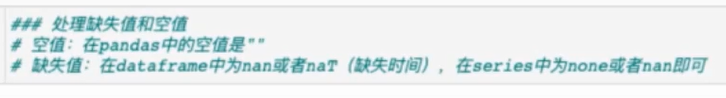

In [34]:
#处理缺失值和空值
#data_select['正文'].isnull()
#data_select['正文'].fillna(0)
data_select['正文'].isnull().value_counts()

False    677258
True         11
Name: 正文, dtype: int64

In [38]:
data_0 = data_select.dropna()
data_0.shape

(677258, 4)

In [39]:
data_0

,正文,日期,time,user_id
LvQzn0z2j,#上海民生##上海疫情##核酸#检测《上海人核酸“续命”尴尬：缺管子、乱加码、排队最长3小时...,2022-06-02,2022-06-02 13:22:28,1000074972
LvqMcaG67,#上海民生##上海疫情##上海复工#上海醒来，6月1号不会是哄孩子的吧。6月1日零时起 上海...,2022-05-30,2022-05-30 19:42:39,1000074972
LteQ4pIio,#上海民生##上海疫情# 有关团长《独家｜起底“团长江湖”：平价被抵制、供应商“强制”加价、...,2022-05-16,2022-05-16 09:38:37,1000074972
LrXv3BmpR,#居委会##上海民生##上海疫情# 上海奇葩居委干部，假借抗疫强索私吞翡翠，官方属实》一个居...,2022-05-07,2022-05-07 23:39:52,1000074972
Lr0xLohc7,#上海民生##上海疫情# 祝贺🎉五一劳动节，迎接双满月，你劳动了吗？,2022-05-01,2022-05-01 17:34:27,1000074972
...,...,...,...,...
LuNJvmTh9,#上海高三高二学生6月6日起复学#是否可以视为社会面全面开放？企业全面复工呢？期待啊！想回公...,2022-05-26,2022-05-26 16:18:54,7762394061
LuNGT7h1B,#上海加快复商复市步伐#首批复市的商店门口人头攒动，市民消费意愿高涨。我好像家里都团齐了，暂...,2022-05-26,2022-05-26 16:12:27,7762394061
LuNFjCwlo,#上海本轮封控期间免收停车费#拿到首批通行证出去转转，看到这么颓废的车车，也不知道这停车费是...,2022-05-26,2022-05-26 16:08:35,7762394061
LuNF4BDiO,每日一善阳光信用 与其临渊羡鱼，不如退而结网🎣，我劳动，我光荣,2022-05-26,2022-05-26 16:07:59,7762394061


In [40]:
condition_1 = pd.date_range(start="20220301", end="20220428", freq="D")
group_1 = (data_0[data_0['日期'].isin(condition_1)])
condition_2 = pd.date_range(start="20220429", end="20220610", freq="D")
group_2 = (data_0[data_0['日期'].isin(condition_2)])
condition_3 = pd.date_range(start="20220611", end="20220801", freq="D")
group_3 = (data_0[data_0['日期'].isin(condition_3)])
# letter列的值如果是'a'，或'b‘,则该行被选中


In [41]:
print(group_1.shape)
print(group_2.shape)
print(group_3.shape)

(297135, 4)
(182710, 4)
(197413, 4)


In [42]:
group_1.head()

,正文,日期,time,user_id
LpT0NtCwy,#上海疫情##上海民生##就这一刻##返乡# 上海返乡潮开启，安徽、江苏和河南人最多，隔离和...,2022-04-24,2022-04-24 08:33:43,1000074972
LpIujEd1e,#上海疫情##上海民生##上海现状# .上海的现状为什么会变成这样我忍不住地继续瞎想外行领导...,2022-04-23,2022-04-23 05:46:14,1000074972
LpBqtcpri,#上海疫情##上海民生# 无间道，罗生门，可能本来就是人生如戏吧，是我太认真了。算...,2022-04-22,2022-04-22 11:47:31,1000074972
LpABl4Bc2,#上海民生##上海疫情##上海团长# 还是你牛逼呀，团长。开个车照送，还是封控小区。,2022-04-22,2022-04-22 09:41:33,1000074972
LpqRJBWAv,明康汇的采购员你成功地把你们老板一个月来的光辉形象給黑了。@明康汇 @市场监管 @江丄孤舟 ...,2022-04-21,2022-04-21 08:54:29,1000074972


In [43]:
#rank是求每个id的用户发了多少帖子
rank = pd.DataFrame(data_select['user_id'].value_counts())
#rank_b是统计每个发帖数，对应多少用户
rank_b = pd.DataFrame(rank['user_id'].value_counts())
#rank_a.columns = ['people']
#rank_b.head(20)

In [44]:
#rank_a.reset_index()

<AxesSubplot:xlabel='user_id', ylabel='Density'>

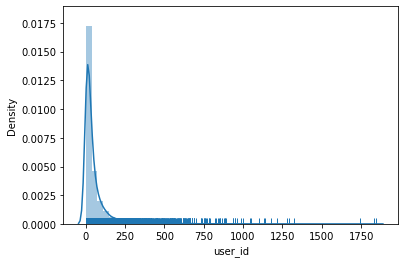

In [45]:
#画发帖数量的密度图
import numpy as np
import seaborn as sns
x = rank['user_id'] 
sns.distplot(x,hist=True,kde=True,rug=True)     #hist控制是否显示条形图,kde控制是否显示核密度估计图,rug控制是否显示观测的小细条（边际毛毯）

<AxesSubplot:xlabel='user_id', ylabel='Density'>

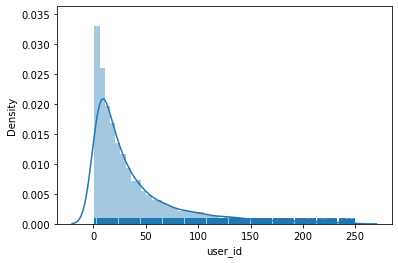

In [46]:
#缩减到发帖数250以内的密度图
rank_a = rank[(rank['user_id'] < 250)]
x = rank_a['user_id'] 
sns.distplot(x,hist=True,kde=True,rug=True)

In [47]:
#去掉重复内容的微博
group_1 = group_1.drop_duplicates(['正文'])
print(group_1.shape)
group_2 = group_2.drop_duplicates(['正文'])
print(group_2.shape)
group_3 = group_3.drop_duplicates(['正文'])
print(group_3.shape)

(284773, 4)
(174208, 4)
(185691, 4)


In [49]:
#写入csv
#group_1.to_csv('D:\my research\group\group_1.csv',encoding="utf-8_sig") 
group_2.to_csv('D:\my research\group\group_2.csv',encoding="utf-8_sig") 
group_3.to_csv('D:\my research\group\group_3.csv',encoding="utf-8_sig") 

In [ ]:
#错误写法condition = [datetime(2022,3,1),datetime(2022,4,28)]
#condition = pd.date_range(start="20220301", end="20220428", freq="D")
#with open("D:\my research\group\group_one.csv","w",encoding='utf-8') as csvfile: 
#    writer = csv.writer(csvfile)
#    #先写入columns_name
#    writer.writerow(['正文','日期', 'time','user_id'])
#    for row in data_select.itertuples() :
#        time = row[1]
#        if time in condition :
#            writer.writerow(row)

In [ ]:
#group_ = pd.read_csv("D:\my research\group\group_one.csv",encoding="utf-8")
#group_.head()

In [ ]:
#group_2
#condition = pd.date_range(start="20220429", end="20220610", freq="D")
#with open("D:\my research\group\group_two.csv",'a+', newline='',encoding='utf-8-sig') as csvfile: 
#    writer = csv.writer(csvfile)
    #先写入columns_name
#    writer.writerow(['content','data', 'time','user_id'])
#    for row in data_select.itertuples() :
#        time = row[1]
#        if time in condition :
#            writer.writerow(row)

In [ ]:
#group1.shape

## 3、将二维列表的值写入excel中

In [ ]:
#利用openpyxl模块实现，还有一种常用的是利用pandas模块，后续进行介绍
#def writeToExcel(file_path, new_list):   #file_path为excel存储路径，new_list为二维列表
#    wb = openpyxl.Workbook()
#    ws = wb.active
#    ws.title = 'feature'
#    for r in range(len(new_list)):
#        for c in range(len(new_list[0])):
#            ws.cell(r + 1, c + 1).value = new_list[r][c]
            # excel中的行和列是从1开始计数的，所以需要+1
#    wb.save(file_path)  # 注意，写入后一定要保存
#    print("成功写入文件: " + file_path + " !")
#    return 1

In [ ]:
#writeToExcel('D:\my research\data_all.xls',data_all)